In [1]:
# 导入常用包
import xgboost as xgb
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectFromModel

In [2]:
# 数据集
cancer = datasets.load_breast_cancer()
X = cancer.data
Y = cancer.target

In [3]:
# 数据集的情况
# X.shape
# Y.shape
# X, Y

In [4]:
# 拆分训练集、测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5., random_state = 8)

In [5]:
xgb_train = xgb.DMatrix(X_train, label = Y_train)
xgb_test  = xgb.DMatrix(X_test,  label = Y_test)

In [6]:
params = {"objective": "binary:logistic",
          "booster": "gbtree",
          "eta": 1,
          "max_depth": 2,
          "eval_metric": "auc"
         }

In [7]:
watchlist = [(xgb_train, 'train')]

In [8]:
# 因为在第9轮(即编号为8)后4次中，auc一直没增加，所以停止迭代
# 如果 watchlist 存在多个元组，则取最后一个元组的值
bst = xgb.train(params, xgb_train, num_boost_round = 100, evals = watchlist, early_stopping_rounds = 4)

[0]	train-auc:0.96315
Will train until train-auc hasn't improved in 4 rounds.
[1]	train-auc:0.98860
[2]	train-auc:0.99233
[3]	train-auc:0.99572
[4]	train-auc:0.99810
[5]	train-auc:0.99885
[6]	train-auc:0.99936
[7]	train-auc:0.99998
[8]	train-auc:1.00000
[9]	train-auc:1.00000
[10]	train-auc:1.00000
[11]	train-auc:1.00000
[12]	train-auc:1.00000
Stopping. Best iteration:
[8]	train-auc:1.00000



In [9]:
# 使用前9棵树进行预测（前9棵数可以通过 bst.best_ntree_limit 来指定）
Y_test_pred = bst.predict(xgb_test, ntree_limit = 9)
print(roc_auc_score(Y_test, Y_test_pred))

0.9952046035805626


In [10]:
bst.best_score, bst.best_iteration, bst.best_ntree_limit

(1.0, 8, 9)

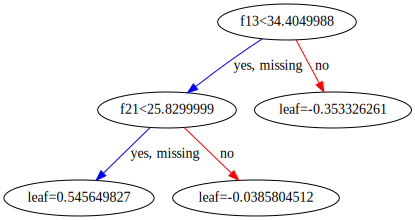

In [11]:
# 共13棵树（编号0~12），bst是12棵树的模型，所以 bst.predict 方法时要使用 ntree_limit 来指定前9棵树
xgb.to_graphviz(bst, fmap = '', num_trees = 12)